In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit
import pandas as pd

In [ ]:
#EX. 1

In [4]:
def poisson(lam):
    u = np.random.rand()
    i = 0
    p0 = np.exp(-lam)
    F = p0
    while u > F:
      i = i + 1
      p0 = (lam/i)*p0
      F = F + p0
    return i


In [5]:
def poisson_mult(lam, n):
   j = 0
   poiss_list = []
   while j < n:
     j = j + 1
     poiss_list.append(poisson(lam))
   return poiss_list




In [ ]:
lam1 = poisson_mult(1,10000)
lam5 = poisson_mult(5,10000)
lam10 = poisson_mult(10,10000)
lam50 = poisson_mult(50,10000)
lam100 = poisson_mult(100,10000)

In [6]:
def bernoulli(p):
  u = np.random.rand()
  if u <= p:
    return 1
  else:
    return 0

In [7]:
def binomial(n,p):
  lista = []
  for i in range(n):
    lista.append(bernoulli(p))
  return(sum(lista))

In [ ]:
binomial(1000,0.01)

12

In [ ]:
bernoulli(0.5)

1

In [8]:
def bernoulli_mult(n,p):
  lista = []
  for i in range(n):
    lista.append(bernoulli(p))
  return(lista)


In [9]:
def bin_mult(n,p,m):
  lista = []
  for i in range(m):
    lista.append(binomial(n,p))
  return(lista)

In [ ]:
bin_vals = bin_mult(1000,0.01,1000)

In [ ]:
poiss_vals = poisson_mult(10,1000)

(array([ 12.,  57., 145., 250., 234., 212.,  61.,  24.,   4.,   1.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <BarContainer object of 10 artists>)

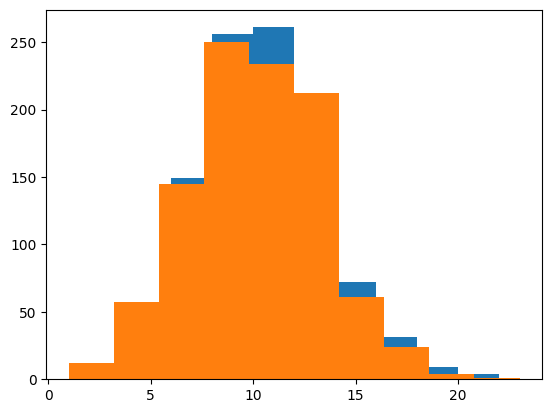

In [ ]:
plt.hist(bin_vals)
plt.hist(poiss_vals)

In [ ]:
#EX 2

In [10]:
def geo(p):
  i = 0
  while bernoulli(p) == 0:
    i = i + 1
  return i


In [ ]:
geo_naive(0.001)

1114

In [11]:
def geo_inv(p):
  u = np.random.rand()
  i = np.floor((np.log(u)/np.log(1-p)) + 1)
  return i

In [ ]:
geo_inv(0.001)

np.float64(2604.8074273428265)

In [12]:
def geo_naive_mult(p,m):
  lista = []
  for i in range(m):
    lista.append(geo_naive(p))
  return lista

In [13]:
def geo_inv_mult(p,m):
  lista = []
  for i in range(m):
    lista.append(geo_inv(p))
  return lista

(array([7.527e+03, 1.202e+03, 6.640e+02, 4.500e+02, 8.500e+01, 3.400e+01,
        3.200e+01, 3.000e+00, 1.000e+00, 2.000e+00]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

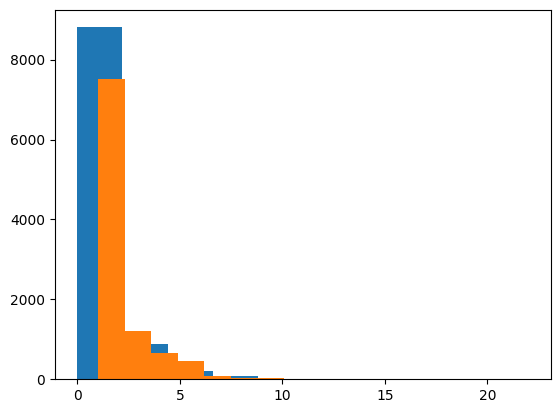

In [ ]:
plt.hist(geo_naive_mult(0.5,10000))
plt.hist(geo_inv_mult(0.5,10000))

In [ ]:
time.time()

1758137187.4281461

In [ ]:
inicio_naive = time.time()
geo_naive_mult(0.001,10000)
fim_naive = time.time()
fim_naive - inicio_naive


7.181410789489746

In [ ]:
inicio_inv = time.time()
geo_inv_mult(0.001,10000)
fim_inv = time.time()
fim_inv - inicio_inv

0.05532670021057129

(array([7.560e+03, 1.229e+03, 8.920e+02, 1.460e+02, 8.900e+01, 6.300e+01,
        1.300e+01, 6.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <BarContainer object of 10 artists>)

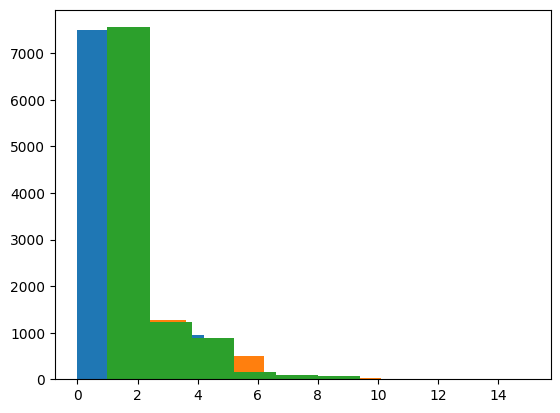

In [ ]:
plt.hist(geo_naive_mult(0.5,10000))
plt.hist(geo_inv_mult(0.5,10000))
plt.hist(np.random.geometric(0.5,10000))

In [ ]:
inicio_naive = time.time()
geo_naive_mult(0.1,10000)
fim_naive = time.time()
fim_naive - inicio_naive

0.0685882568359375

In [ ]:
inicio_inv = time.time()
geo_inv_mult(0.1,10000)
fim_inv = time.time()
fim_inv - inicio_inv

0.04334878921508789

In [ ]:
inicio_naive = time.time()
geo_naive_mult(0.9,10000)
fim_naive = time.time()
fim_naive - inicio_naive

0.009859561920166016

In [ ]:
inicio_inv = time.time()
geo_inv_mult(0.9,10000)
fim_inv = time.time()
fim_inv - inicio_inv

0.05603671073913574

In [ ]:
#EX 3

In [28]:
def neg_bin_via_ber(r,p):
  i = 0
  lista = []
  while sum(lista) < r:
    lista.append(bernoulli(p))
    i = i + 1
  return [len(lista)]

In [29]:
def neg_bin_via_ber_mult(r,p,m):
  lista = []
  for i in range(m):
    lista.append(neg_bin_via_ber(r,p))
  return lista

In [31]:
neg_bin_via_ber(4,0.5)

[15]

In [32]:
def neg_bin_via_geo(r,p):
  x = sum(geo_inv_mult(p,r))
  return x

In [33]:
def neg_bin_via_geo_mult(r,p,m):
  lista = []
  for i in range(m):
    lista.append(neg_bin_via_geo(r,p))
  return lista

In [34]:
neg_bin_via_geo(4,0.5)

np.float64(10.0)

In [35]:
def neg_bin_via_unif(r,p):
  u = np.random.uniform()
  i = 0
  n = r
  pn = p**r
  f = pn
  while u > f:
    update = (n/(n-r+1))*(1-p)
    pn = pn*update
    f += pn
    n += 1
  return n


In [36]:
def neg_bin_via_unif_mult(r,p,m):
  lista = []
  for i in range(m):
    lista.append(neg_bin_via_unif(r,p))
  return lista

In [37]:
neg_bin_via_unif(4,0.5)

7

In [44]:
neg_bin_via_ber_mult(4,0.5,10000)

[[14],
 [5],
 [4],
 [6],
 [10],
 [5],
 [10],
 [13],
 [11],
 [6],
 [8],
 [6],
 [7],
 [8],
 [6],
 [8],
 [10],
 [9],
 [7],
 [8],
 [8],
 [11],
 [5],
 [9],
 [5],
 [6],
 [5],
 [4],
 [11],
 [17],
 [9],
 [4],
 [8],
 [11],
 [7],
 [7],
 [10],
 [12],
 [4],
 [9],
 [5],
 [5],
 [6],
 [5],
 [9],
 [14],
 [9],
 [5],
 [7],
 [4],
 [8],
 [5],
 [7],
 [11],
 [5],
 [9],
 [8],
 [10],
 [7],
 [17],
 [8],
 [6],
 [5],
 [10],
 [6],
 [9],
 [9],
 [9],
 [8],
 [8],
 [8],
 [7],
 [6],
 [11],
 [6],
 [11],
 [15],
 [11],
 [5],
 [10],
 [22],
 [9],
 [9],
 [6],
 [4],
 [7],
 [9],
 [7],
 [6],
 [8],
 [9],
 [6],
 [10],
 [17],
 [8],
 [10],
 [10],
 [10],
 [11],
 [11],
 [17],
 [5],
 [8],
 [4],
 [6],
 [8],
 [7],
 [11],
 [7],
 [8],
 [9],
 [9],
 [14],
 [5],
 [4],
 [14],
 [5],
 [9],
 [5],
 [9],
 [10],
 [10],
 [7],
 [6],
 [10],
 [11],
 [16],
 [12],
 [10],
 [10],
 [5],
 [8],
 [16],
 [11],
 [5],
 [20],
 [5],
 [7],
 [7],
 [15],
 [8],
 [9],
 [7],
 [8],
 [6],
 [11],
 [7],
 [8],
 [8],
 [6],
 [5],
 [10],
 [10],
 [6],
 [11],
 [9],
 [5],
 [8],
 [

In [45]:
amostra_neg_bin_via_ber = neg_bin_via_ber_mult(4,0.5,1000)

In [46]:
amostra_neg_bin_via_geo = neg_bin_via_geo_mult(4,0.5,1000)

In [47]:
amostra_neg_bin_via_unif = neg_bin_via_unif_mult(4,0.5,1000)

In [48]:
amostra_via_np = np.random.negative_binomial(4, 0.5,1000)

(array([200., 281., 257., 150.,  65.,  31.,   9.,   6.,   0.,   1.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

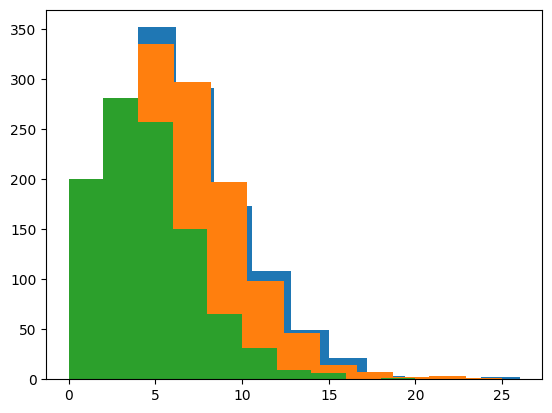

In [49]:
plt.hist(amostra_neg_bin_via_ber)
plt.hist(amostra_neg_bin_via_geo)
plt.hist(amostra_neg_bin_via_unif)
plt.hist(amostra_via_np)

In [ ]:
# r = 5, p = 0.1

In [51]:
#tempo neg_bin_via_ber
inicio = time.time()
neg_bin_via_ber(5,0.1)
fim = time.time()
fim - inicio

0.0010297298431396484

In [52]:
#tempo neg_bin_via_geo
inicio = time.time()
neg_bin_via_geo(5,0.1)
fim = time.time()
fim - inicio

0.00020623207092285156

In [53]:
#tempo neg_bin_via_unif
inicio = time.time()
neg_bin_via_unif(5,0.1)
fim = time.time()
fim - inicio

0.0001621246337890625

In [54]:
#tempo neg_bin_np
inicio = time.time()
np.random.negative_binomial(5, 0.1)
fim = time.time()
fim - inicio

0.00016236305236816406

In [ ]:
 #r = 20, p = 0.9

In [55]:
#tempo neg_bin_via_ber
inicio = time.time()
neg_bin_via_ber(5,0.1)
fim = time.time()
fim - inicio

0.00021314620971679688

In [56]:
#tempo neg_bin_via_geo
inicio = time.time()
neg_bin_via_geo(5,0.1)
fim = time.time()
fim - inicio

0.0001971721649169922

In [57]:
#tempo neg_bin_via_unif
inicio = time.time()
neg_bin_via_unif(5,0.1)
fim = time.time()
fim - inicio

0.0001475811004638672

In [58]:
#tempo neg_bin_np
inicio = time.time()
np.random.negative_binomial(5, 0.1)
fim = time.time()
fim - inicio

0.00012040138244628906

In [ ]:
#EX 4

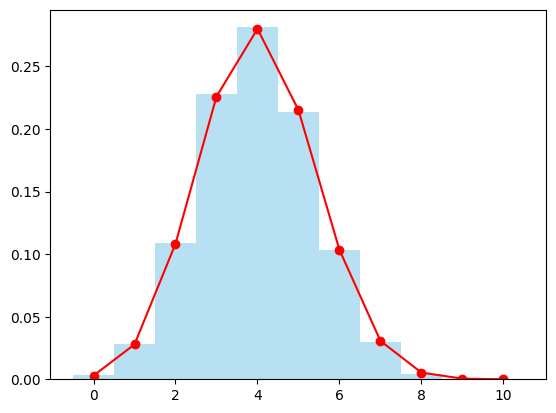

In [62]:
from scipy.stats import hypergeom


N = 50
K = 20
n = 10
nsim = 10000

def fisher_yates_partial(N, K, n):




    pop = [1]*K + [0]*(N-K)


    for i in range(n):
        j = np.random.randint(i, N)
        pop[i], pop[j] = pop[j], pop[i]


    return sum(pop[:n])


amostras = [fisher_yates_partial(N, K, n) for _ in range(nsim)]


x = np.arange(0, n+1)
pmf = hypergeom.pmf(x, N, K, n)


plt.hist(amostras, bins=np.arange(-0.5, n+1.5, 1), density=True, alpha=0.6, color='skyblue', label='Simulação')
plt.plot(x, pmf, 'o-', color='red', label='Distribuição teórica (PMF)')

